# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, binarize
# modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/project/credit card/Copy of default of credit card clients.csv",index_col=0)

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 24)

The raw dataset comes with columns that are not easy to read. By using Data Description Attribute Information given , we can replace these names with more descriptive ones.

In [ ]:
list_ = ['max_credit_given', 'gender', 'education', 'marital_status', 'age',
'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 
'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
col_rename = dict(zip(df.columns,list_))
df = df.rename(columns=col_rename)

In [ ]:
df.head()

,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   max_credit_given  30000 non-null  int64
 1   gender            30000 non-null  int64
 2   education         30000 non-null  int64
 3   marital_status    30000 non-null  int64
 4   age               30000 non-null  int64
 5   pay_status_sept   30000 non-null  int64
 6   pay_status_aug    30000 non-null  int64
 7   pay_status_july   30000 non-null  int64
 8   pay_status_june   30000 non-null  int64
 9   pay_status_may    30000 non-null  int64
 10  pay_status_april  30000 non-null  int64
 11  bill_sept         30000 non-null  int64
 12  bill_aug          30000 non-null  int64
 13  bill_july         30000 non-null  int64
 14  bill_june         30000 non-null  int64
 15  bill_may          30000 non-null  int64
 16  bill_april        30000 non-null  int64
 17  payment_sept      30000 non-nul

In [ ]:
df[['gender', 'education', 'marital_status']].describe()

,gender,education,marital_status
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


The gender column is fine, but education has an extra value '6' and marital_status has an extra value of '0'.

In [ ]:
df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

**As we can see education has 6 values in dataset but in the Attribute Information there is only 4 values**

**we can just reassign the extra values as '4' for 'other'.**

In [ ]:
df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

**The marital_status column also has an '0' value, so we'll do the same and reassign it as '3' for 'other'. It's safe to do this because 'other' could stand for 'divorced' or another type of relationship status.**

In [ ]:
fix_edu = (df.education == 5) | (df.education == 6) | (df.education == 0)
df.loc[fix_edu, 'education'] = 4
df.loc[df.marital_status == 0, 'marital_status'] = 3

fixing 'education' column by putting unknown variables in 'other' category (4)

fixing 'marital_status' column by putting unknown variables in 'other' category (3)

# **Exploratory Data Analysis (EDA)**

Text(0.5, 1.0, 'gender v/s count')

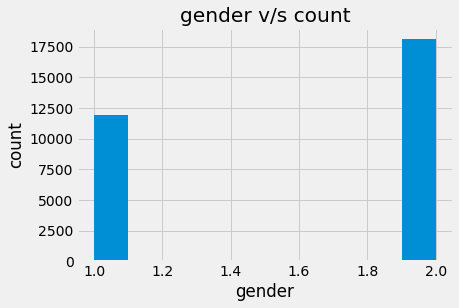

In [ ]:
plt.style.use('fivethirtyeight')
df['gender'].hist()
plt.xlabel('gender')
plt.ylabel('count')
plt.title('gender v/s count')

**Number of Male credit holder is less than compared with Female**

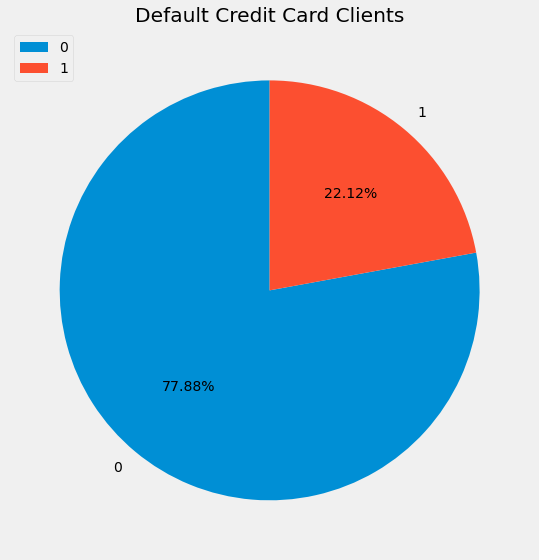

In [ ]:
default = [0,1]
values = df.default.value_counts()
plt.figure(figsize = (15, 9))
plt.pie(values, labels = default,autopct = "%.2f%%",startangle = 90)
plt.title("Default Credit Card Clients")
plt.legend()
plt.show();

**Percentage of Defaulters are smaller than the Non Defaulters in the given dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


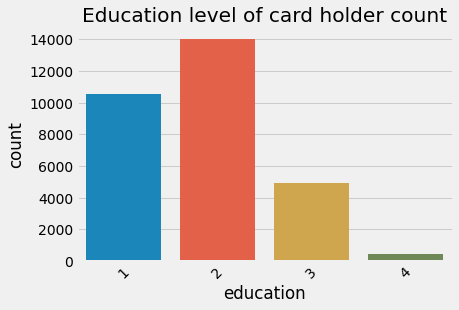

In [ ]:
sns.countplot(df['education'])
plt.xticks(rotation=45)
plt.title("Education level of card holder count")
plt.show()

**More number of credit holders are university students followed by Graduates and then High school students**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


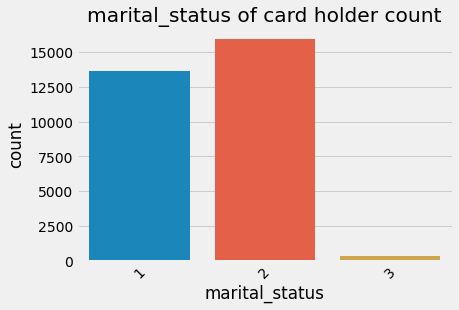

In [ ]:
sns.countplot(df['marital_status'])
plt.xticks(rotation=45)
plt.title("marital_status of card holder count")
plt.show()

**More number of credit cards holder are Married**

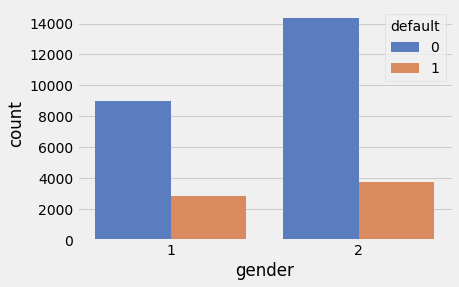

In [ ]:
# "count on default based on gender"
sns.countplot(x='gender', data=df,hue="default", palette="muted")

**It is evident from the above output that females have overall less default payments wrt males**

**Non-Defaults have a higher proportion of Females (gender=2)**

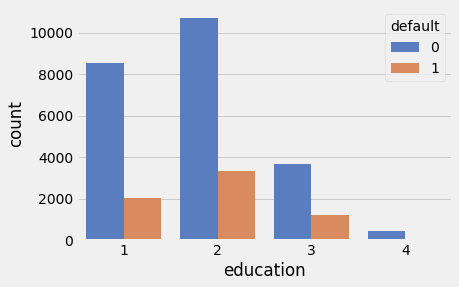

In [ ]:
g=sns.countplot(x="education", data=df,hue="default", palette="muted")

From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people

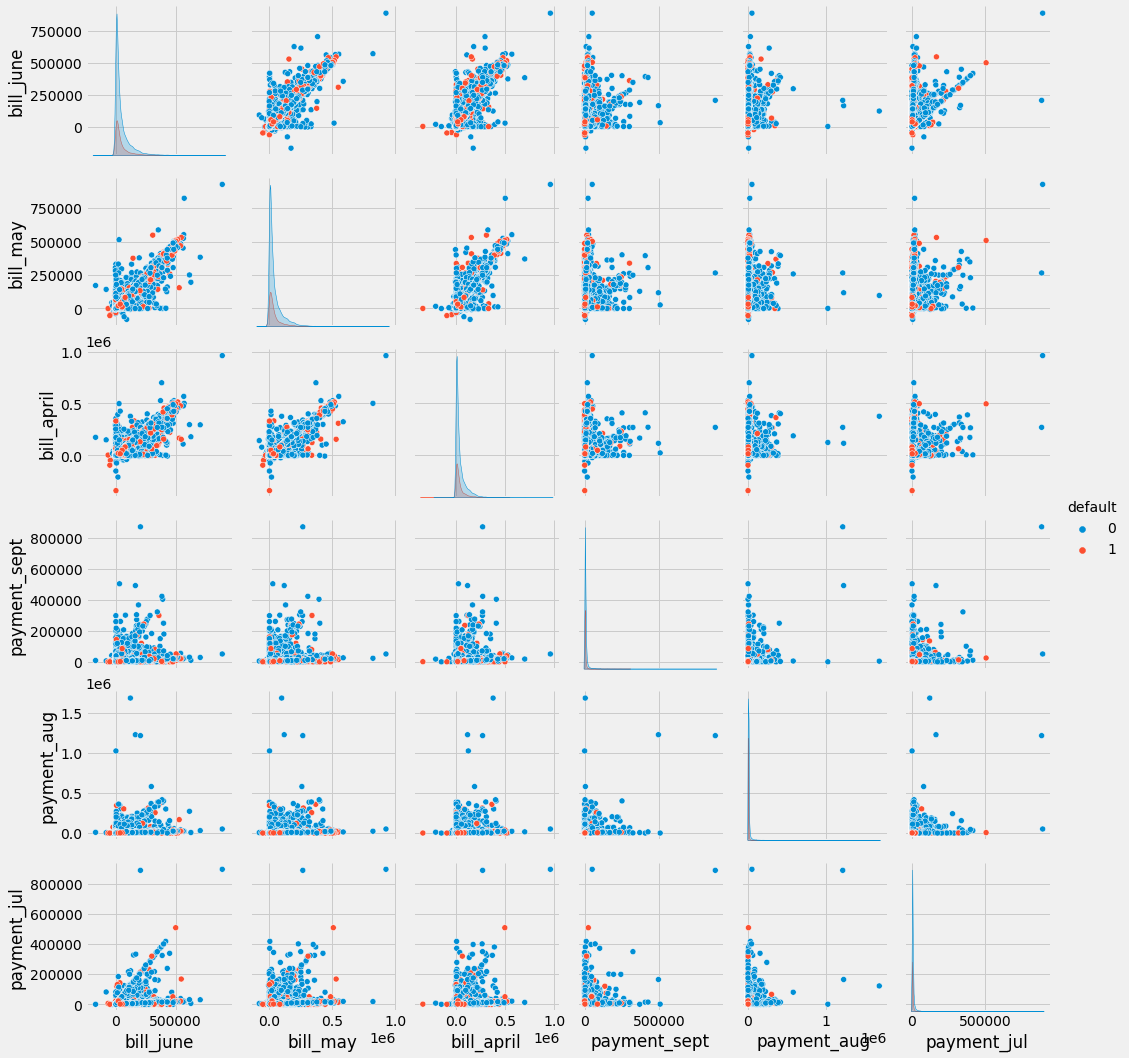

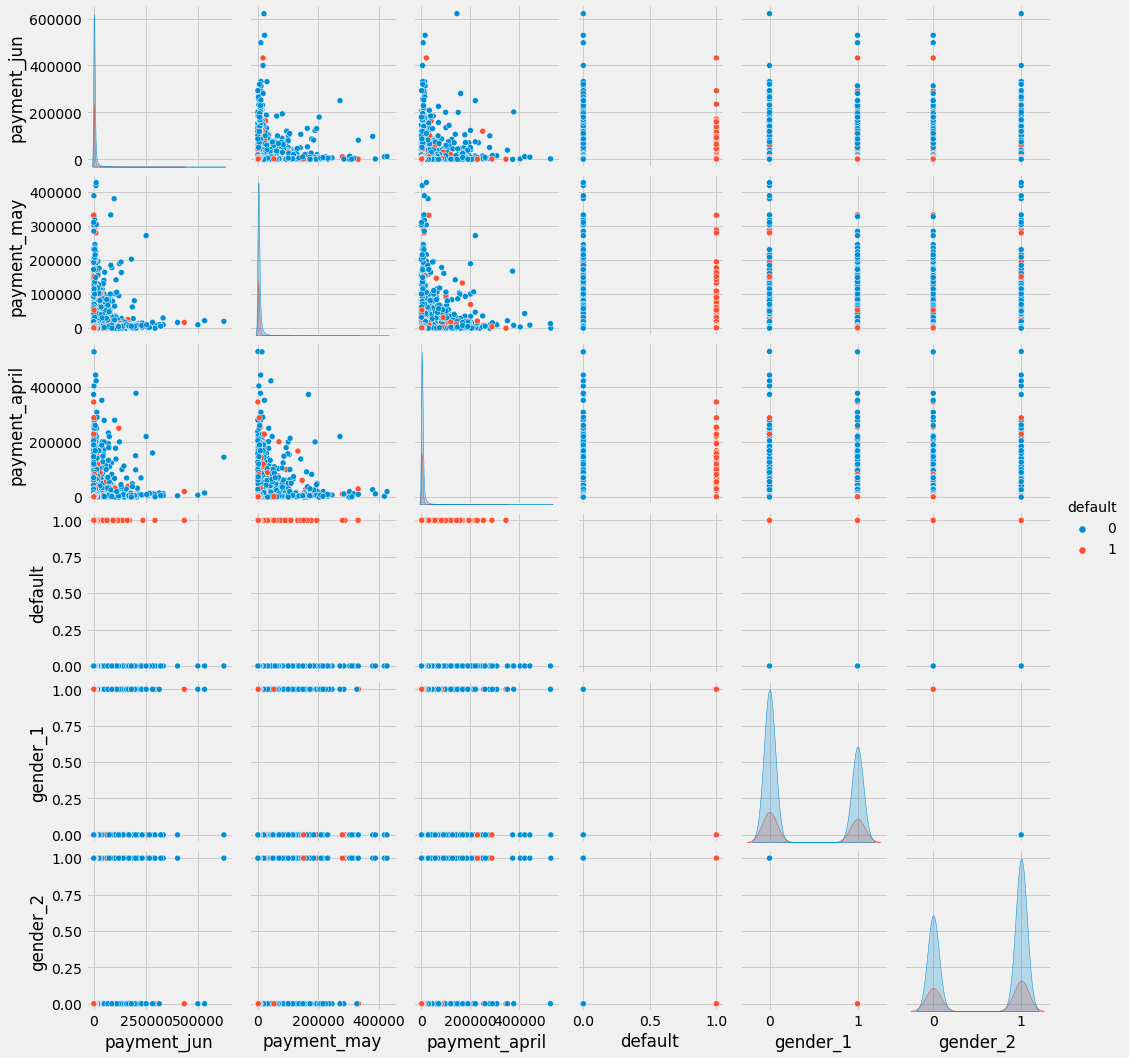

In [ ]:
sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'default')
sns.pairplot(df, vars=df.columns[17:23],hue = 'default')

we can conclude that every data is colapsed with each other and not normally distributed

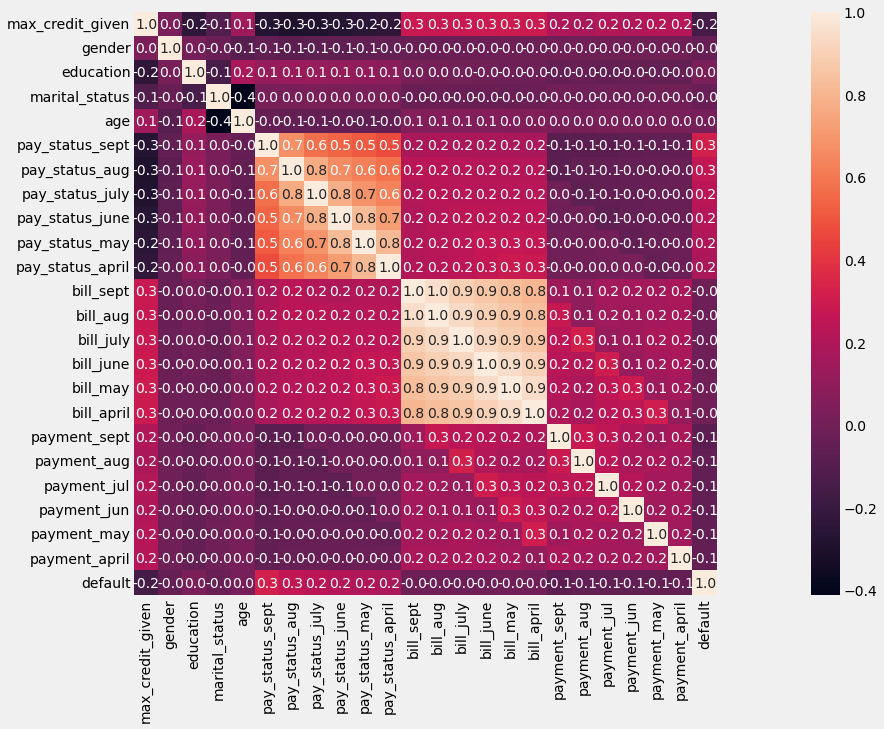

In [ ]:
correlation = df.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  

So it looks like the PAY_status, bill_amount variables are the strongest predictors of default

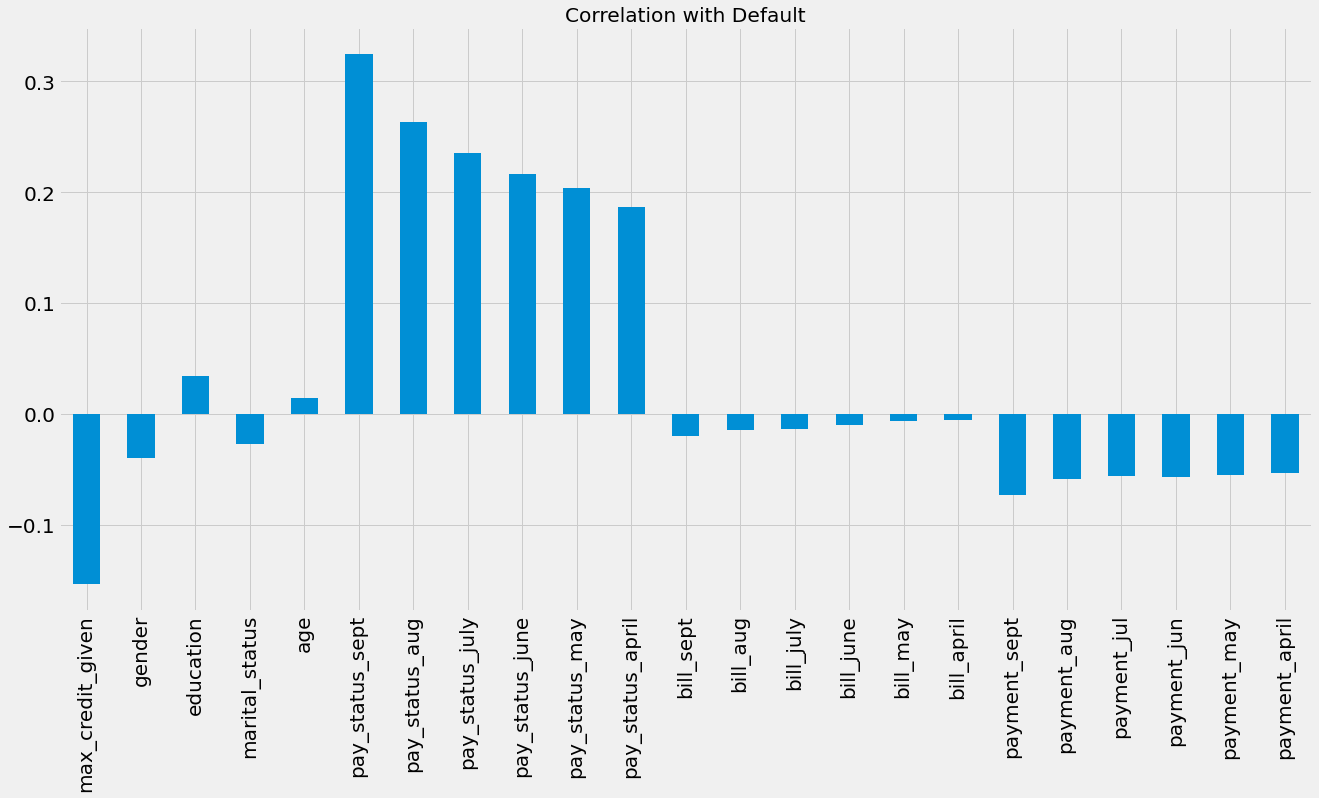

In [ ]:
X = df.drop(['default'],axis=1)
X.corrwith(df['default']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

From the above graph we see most negatively correlated feature is max_credit but we cannot blindly remove this feature because it is very important feature for prediction. 

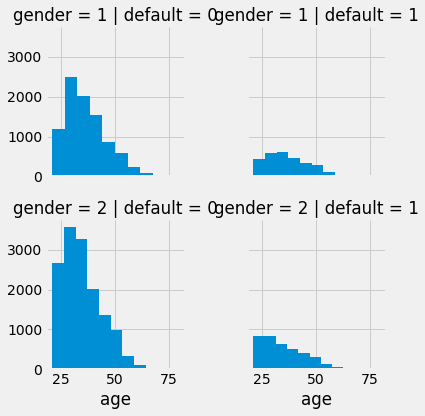

In [ ]:
g = sns.FacetGrid(df, col = 'default', row = 'gender')
g.map(plt.hist, 'age')

From the above Plot we can see that NonDefaults have a higher proportion of people 30-40years

# How many people have defaulted on their payment?

In [ ]:
df.default.sum() / len(df.default)

0.2212

This means that 22% of people in this dataset have defaulted. When we check the class imbalance later, that value should be the same.

# **Feature Engineering**

In [ ]:

df[['gender','education','marital_status']] = df[['gender','education','marital_status']].astype('object')
df = pd.get_dummies(df)
df.head()

,max_credit_given,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,pay_status_may,pay_status_april,bill_sept,bill_aug,...,default,gender_1,gender_2,education_1,education_2,education_3,education_4,marital_status_1,marital_status_2,marital_status_3
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,1,0,1,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,1,0,1,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,1,0,1,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,1,0,1,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,1,0,0,1,0,0


Earlier, we fixed the values in the catigorical values, gender, education and marital_status. The next step is to dummy these categorical variables so that machine learning models and "understand" them.

## **Spiliting Dataset into training(80%) and test set(20%)**

In [ ]:
# split matrix of features
X = df.drop('default', axis = 1)
# split target variable
y = df['default'] 

we seperate out the target variable, default as y and others as x

In [ ]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

It does look like there's a class imbalance here. Let's visualize this distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


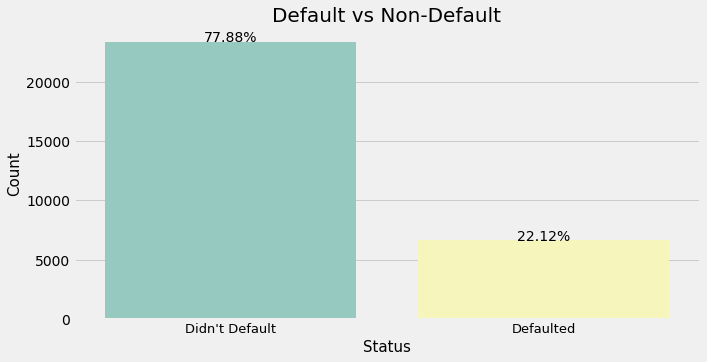

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['default'], palette='Set3')

ax.set_title('Default vs Non-Default',fontsize = 20)
ax.set_xlabel('Status',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Didn\'t Default','Defaulted'],fontsize = 13)

# adding percentage to the top of each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 

As mentioned only 22% of people in this dataset defaulted on their credict card payment. Class imbalances such as this one can present challenges for the machine learning algorithm. Therefore, we can try to remedy this.

**We can deal with this class imbalance by just penalizing the algorithm**

# **Evaluation Metric**

For this problem, we'll be using F1 score as the main evaluation metric. This metric is suited for datasets with class imbalance. Also, it's the harmonic mean of precision and recall.

# **Performing Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# **Standardization**

In [ ]:
# instantiating scaler
scaler = StandardScaler()  
scaler.fit(X_train)
# applying scaler to data
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

We can also apply a standard scaler to the data so that its magnitudes are normalized. This could help the learning algorithms and speed up calculations.

# **Model Fitting**

# **1:KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [ ]:
# predicting the training set
knn_y_pred_train = knn.predict(X_train)
# predicting the testing set
knn_y_pred_test = knn.predict(X_test)

In [ ]:
print('Not tuned K Nearest Neighbors Model')
print("Train F1 Score: ", metrics.f1_score(y_train, knn_y_pred_train))
print("Test F1 Score: ", metrics.f1_score(y_test, knn_y_pred_test))

Not tuned K Nearest Neighbors Model
Train F1 Score:  0.999625748502994
Test F1 Score:  0.3963792282039066


It seems that this KNN model is way overfit and the testing metric isn't that good. Before addressing the overfitting, let's try to improve the testing metric with grid search. By optimizing the model's hyperparameters, the accuracy of predictions can improve.

In [ ]:
train_base_knn = metrics.f1_score(y_train, knn_y_pred_train)
test_base_knn = metrics.f1_score(y_test, knn_y_pred_test)

In [ ]:
# creating dictionary to store all metrics
metric_dict = {}
metric_dict['Base KNN'] = {'Training F1': train_base_knn, 'Testing F1': test_base_knn}

# **Grid Search & Hyperparameter Tuning of KNN**

In [ ]:
k_near = KNeighborsClassifier(weights='distance')

In [ ]:
k_param_dict={'n_neighbors': range(4,20,1)}

In [ ]:
grid_knn = GridSearchCV(k_near, k_param_dict, cv=5, scoring='f1', verbose=1)

In [ ]:
grid_knn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': range(4, 20)}, scoring='f1', verbose=1)

In [ ]:
# examine the best model
# Best F1 scoree achieved across all params
print('F1 Score:', grid_knn.best_score_)

# Checking dictionary showing the best hyperparameters used to generate that score
print('Best Hyperparameters:', grid_knn.best_params_)


F1 Score: 0.4319363102823357
Best Hyperparameters: {'n_neighbors': 10}


Grid search found that the 'best' KNN model has n_neighbors of 10. Let's take a look at the evaulation metrics of this model.



In [ ]:
# Predict the response for test dataset
tuned_knn_y_pred_train = grid_knn.best_estimator_.predict(X_train)
# predict the training set
tuned_knn_y_pred_test = grid_knn.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, tuned_knn_y_pred_test)
acc = accuracy_score(y_test, tuned_knn_y_pred_test)
prec = precision_score(y_test, tuned_knn_y_pred_test)
rec = recall_score(y_test, tuned_knn_y_pred_test)
f1 = f1_score(y_test, tuned_knn_y_pred_test)

In [ ]:
model_results = pd.DataFrame([['KNN', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.779167,0.488449,0.573643,0.527629,0.70455


This tuned model has a slightly better F1 score, improving from the previous 0.39. However it's still severely overfit.We should investigate other baseline models.

In [ ]:
train_tuned_knn = metrics.f1_score(y_train, tuned_knn_y_pred_train)
test_tuned_knn = metrics.f1_score(y_test, tuned_knn_y_pred_test)

In [ ]:
metric_dict['Tuned KNN'] = {'Training F1': train_tuned_knn, 'Testing F1': test_tuned_knn}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

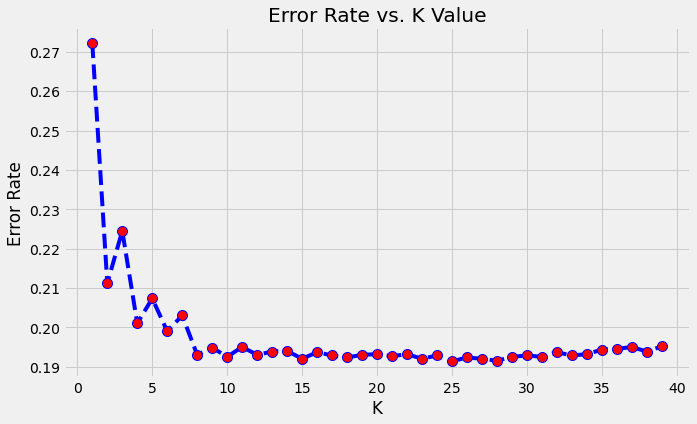

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# **Error rate keeps on decresaing when we increase K value**

# **2:Logisitic Regression**

In [ ]:
# instantiate logistic regression
logreg = LogisticRegression(C=1e9, class_weight='balanced')

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced')

In [ ]:
# predict the training set
logreg_y_pred_train = logreg.predict(X_train)
# predict the testing set
logreg_y_pred_test = logreg.predict(X_test)

In [ ]:
print('Untuned Logistic Regression Model')
print("Train F1 Score: ", metrics.f1_score(y_train, logreg_y_pred_train))
print("Test F1 Score: ", metrics.f1_score(y_test, logreg_y_pred_test))

Untuned Logistic Regression Model
Train F1 Score:  0.48615809458060066
Test F1 Score:  0.45854483925549916


In [ ]:
train_base_log_reg = metrics.f1_score(y_train, logreg_y_pred_train)
test_base_log_reg = metrics.f1_score(y_test, logreg_y_pred_test)

In [ ]:

metric_dict['Baseline Logistic Regression'] = {'Training F1': train_base_log_reg, 'Testing F1': test_base_log_reg}

 This model performed much better than the other KNN models. It's not overfit and it has a higher F1 on the testing set. To get a better sense of the model's performance, let's also look at the ROC/AUC score.

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

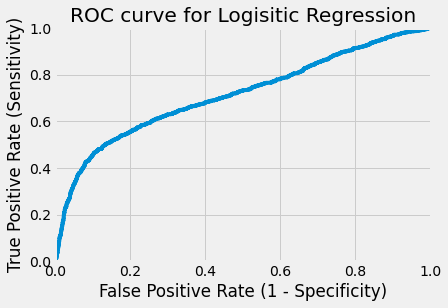

In [ ]:
# ROC Curve graph
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logisitic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7132098948303955


we want an ROC to be the upper left corner of the graph. So, the ROC curve for this model isn't too bad! And a perfect AUC score would be 1. Therefore, this model's predictions are only about 71.32% correct.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


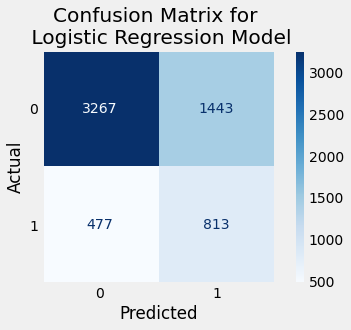

In [ ]:
# confusion matrix
log_reg_conf_matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)
log_reg_conf_matrix.ax_.set_title('Confusion Matrix for \n Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)

As mentioned, the Recall of this model isn't the best. We can try improving this model from here.

# **Grid Search**

Logistic Regression models don't have many hyperparameters to tune, but it's worth a shot to see if we can improve the evaluation metrics a bit.

In [ ]:
# creating our estimator
tuned_log = LogisticRegression(random_state=6, class_weight='balanced')

In [ ]:
log_param_dict={'C': range(3,7,1),
                'penalty': ['l1','l2']}

In [ ]:
grid_log = GridSearchCV(tuned_log, log_param_dict, cv=5, scoring='f1', verbose=1)

In [ ]:
grid_log.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=6),
             param_grid={'C': range(3, 7), 'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [ ]:
print('F1 Score:', grid_log.best_score_)
print('Best Hyperparameters:', grid_log.best_params_)
print('Model object with best parameters: ')
print(grid_log.best_estimator_)

F1 Score: 0.48308353259389136
Best Hyperparameters: {'C': 3, 'penalty': 'l2'}
Model object with best parameters: 
LogisticRegression(C=3, class_weight='balanced', random_state=6)


In [ ]:
# predict the testing dataset
grid_log_y_pred_train = grid_log.best_estimator_.predict(X_train)

# predict the training set
grid_log_y_pred_test = grid_log.best_estimator_.predict(X_test)

print('Tuned Logistic Regression Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, grid_log_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, grid_log_y_pred_test))

Tuned Logistic Regression Model Predictions
F1 on train set: 0.4861916597624966
F1 on test set: 0.45854483925549916


This model actually generated the same exact evaluation metrics as the baseline Logistic Regression model. As I mentioned before, this is probably because Logistic Regression models don't have many hyperparameters to tune. 


In [ ]:
roc=roc_auc_score(y_test,grid_log_y_pred_test)
acc = accuracy_score(y_test, grid_log_y_pred_test)
prec = precision_score(y_test, grid_log_y_pred_test)
rec = recall_score(y_test, grid_log_y_pred_test)
f1 = f1_score(y_test, grid_log_y_pred_test)
results = pd.DataFrame([['logistic', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.779167,0.488449,0.573643,0.527629,0.704550
1,logistic,0.680000,0.360372,0.630233,0.458545,0.661932


In [ ]:
train_tuned_log_reg = metrics.f1_score(y_train, grid_log_y_pred_train)
test_tuned_log_reg = metrics.f1_score(y_test, grid_log_y_pred_test)

In [ ]:
metric_dict['Tuned Logistic Regression'] = {'Training F1': train_tuned_log_reg, 'Testing F1': test_tuned_log_reg}

# **3: Decision Tree**

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# predict the training set
tree_y_pred_train = tree.predict(X_train)
# predict the testing set
tree_y_pred_test = tree.predict(X_test)

In [ ]:
print('Untuned Decision Tree Model')
print("Training F1 Score: ", metrics.f1_score(y_train, tree_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, tree_y_pred_test))

Untuned Decision Tree Model
Training F1 Score:  0.9987828854976125
Testing F1 Score:  0.3894069377098097


The baseline Decision Tree model performed much worse than the other model iterations. It's also severely overfit. Let's see if we can improve this with grid search.

In [ ]:
train_base_tree = metrics.f1_score(y_train, tree_y_pred_train)
test_base_tree = metrics.f1_score(y_test, tree_y_pred_test)

In [ ]:
metric_dict['Baseline Decision Tree'] = {'Training F1': train_base_tree, 'Testing F1': test_base_tree}

# **Grid Search**

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=3, criterion='gini')

In [ ]:
# creating our parameters to test
param_dict={'max_depth': range(2,15,1), 
            'max_leaf_nodes': range(2,30,2),
            'min_samples_split': range(2,4,1)}

In [ ]:
grid_tree = GridSearchCV(decision_tree, param_dict, cv=5, scoring='f1', verbose=1)

In [ ]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 364 candidates, totalling 1820 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'max_depth': range(2, 15),
                         'max_leaf_nodes': range(2, 30, 2),
                         'min_samples_split': range(2, 4)},
             scoring='f1', verbose=1)

In [ ]:
# Best F1 scoree achieved across all params
print('F1 Score:', grid_tree.best_score_)
print('Best Hyperparameters:', grid_tree.best_params_)
print('Model object with best parameters: ')
print(grid_tree.best_estimator_)

F1 Score: 0.48279559935854566
Best Hyperparameters: {'max_depth': 7, 'max_leaf_nodes': 22, 'min_samples_split': 2}
Model object with best parameters: 
DecisionTreeClassifier(max_depth=7, max_leaf_nodes=22, random_state=3)


In [ ]:
# predict the testing set
tuned_tree_y_pred_train = grid_tree.best_estimator_.predict(X_train)
# predict the training set
tuned_tree_y_pred_test = grid_tree.best_estimator_.predict(X_test)
# Model F1, how often is the classifier correct?
print('Tuned Decision Tree Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))

Tuned Decision Tree Model Predictions
F1 on train set: 0.4941176470588235
F1 on test set: 0.46983815595880335


We were able to solve the overfitting issue. Unfortunately, this F1 score isn't as high as .541 on the Logistic Regression model.

In [ ]:
train_tuned_tree = metrics.f1_score(y_train, tuned_tree_y_pred_train)
test_tuned_tree = metrics.f1_score(y_test, tuned_tree_y_pred_test)

In [ ]:
metric_dict['Tuned Decision Tree'] = {'Training F1': train_tuned_tree, 'Testing F1': test_tuned_tree}

In [ ]:
roc=roc_auc_score(y_test, tuned_tree_y_pred_test)
acc = accuracy_score(y_test, tuned_tree_y_pred_test)
prec = precision_score(y_test, tuned_tree_y_pred_test)
rec = recall_score(y_test, tuned_tree_y_pred_test)
f1 = f1_score(y_test, tuned_tree_y_pred_test)

results = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(results, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.779167,0.488449,0.573643,0.527629,0.704550
1,logistic,0.680000,0.360372,0.630233,0.458545,0.661932
2,Decision Tree Classifier,0.819833,0.639519,0.371318,0.469838,0.656996


# **4: Random Forest**

Instead of creating a baseline Random Forest model, we can select into performing grid search. 

This is because a Random Forest algorithm is essentially an ensamble method with many of Decision Trees. 

Therefore, our initial Decision Tree is technically the baseline already.

In [ ]:
rfc = RandomForestClassifier(random_state = 5, criterion='gini' , class_weight='balanced')

In [ ]:
# creating our parameters to test
rfc_param_dict={'n_estimators':[50,100],
            'max_depth': list(range(2,15)), 
            'max_features': list(range(5,15))
            }

In [ ]:
grid_forest = GridSearchCV(rfc, rfc_param_dict, cv=5, scoring='f1', verbose=1, n_jobs=2)

In [ ]:
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=5),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [ ]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

0.5484134880250734
{'max_depth': 8, 'max_features': 6, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=6,
                       random_state=5)


In [ ]:
# predict the testing set
forest_y_pred_train = grid_forest.best_estimator_.predict(X_train)

# predict the training set
forest_y_pred_test = grid_forest.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print("F1 on train set: ",metrics.f1_score(y_train, forest_y_pred_train))
print("F1 on test set: ",metrics.f1_score(y_test, forest_y_pred_test))

F1 on train set:  0.5918385103976334
F1 on test set:  0.5276292335115864


This Random Forest model performed the best out of all the model iterations. This will be the final model, so let's perform some analysis on how it is able to predict each label.

In [ ]:
train_tuned_forest = metrics.f1_score(y_train, forest_y_pred_train)
test_tuned_forest = metrics.f1_score(y_test, forest_y_pred_test)

In [ ]:
metric_dict['Tuned Random Forest'] = {'Training F1': train_tuned_forest, 'Testing F1': test_tuned_forest}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


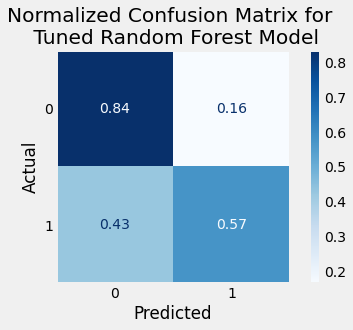

In [ ]:
normalized_forest_conf_matrix = plot_confusion_matrix(grid_forest, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
normalized_forest_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Tuned Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

In [ ]:
roc=roc_auc_score(y_test,forest_y_pred_test)
acc = accuracy_score(y_test, forest_y_pred_test)
prec = precision_score(y_test, forest_y_pred_test)
rec = recall_score(y_test, forest_y_pred_test)
f1 = f1_score(y_test, forest_y_pred_test)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model_results = model_results.append(results, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN,0.779167,0.488449,0.573643,0.527629,0.704550
1,logistic,0.680000,0.360372,0.630233,0.458545,0.661932
2,Decision Tree Classifier,0.819833,0.639519,0.371318,0.469838,0.656996
3,Random tree Classifier,0.779167,0.488449,0.573643,0.527629,0.704550


# **5:Support Vector Machine**

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# predict the training set
svm_y_pred_train = scv.predict(X_train)
# predict the testing set
svm_y_pred_test = scv.predict(X_test)

In [ ]:
print('Untuned svm Model')
print("Training F1 Score: ", metrics.f1_score(y_train, svm_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, svm_y_pred_test))

Untuned svm Model
Training F1 Score:  0.47211381090268156
Testing F1 Score:  0.4286461055933089


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_y_pred_test)

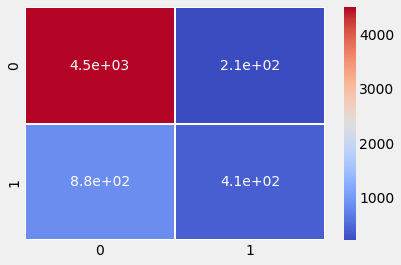

In [ ]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')

In [ ]:
svm_base_tree = metrics.f1_score(y_train, svm_y_pred_train)
svm_base_tree = metrics.f1_score(y_test, svm_y_pred_test)

In [ ]:
metric_dict['Baseline svm'] = {'Training F1': svm_base_tree, 'Testing F1': svm_base_tree}

# **Comparing All Model**

In [ ]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,Training F1,Testing F1
Base KNN,0.999626,0.396379
Tuned KNN,0.999626,0.408933
Baseline Logistic Regression,0.486158,0.458545
Tuned Logistic Regression,0.486192,0.458545
Baseline Decision Tree,0.998783,0.389407
Tuned Decision Tree,0.494118,0.469838
Tuned Random Forest,0.591839,0.527629
Baseline svm,0.428646,0.428646


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


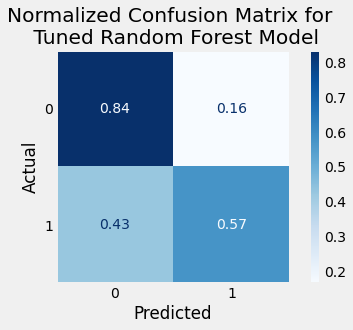

In [ ]:
normalized_forest_conf_matrix = plot_confusion_matrix(grid_forest, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
normalized_forest_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Tuned Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.show()

This model is able to correctly predict the 'default' label 57% of the time. Although this isn't an ideal metric, it's the best under the contraints of this project. Simple classification algorithms such as these typically don't perform well with imbalanced data. And a next step would be to try more complex algorithms such as neural networks.

# **CONFUSION MATRIX for Model Evaluation**

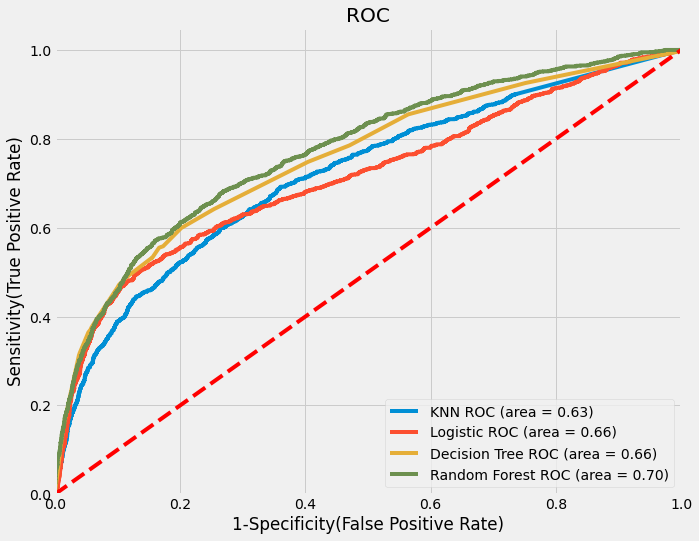

In [ ]:
from sklearn import metrics

# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
tuned_knn_y_pred_test =grid_knn.predict_proba(X_test)[:,1]
grid_log_y_pred_test =grid_log.predict_proba(X_test)[:,1]
tuned_tree_y_pred_test =grid_tree.predict_proba(X_test)[:,1]
forest_y_pred_test =grid_forest.predict_proba(X_test)[:,1]


model = [grid_knn,grid_log,grid_tree,grid_forest]

models=[tuned_knn_y_pred_test,grid_log_y_pred_test,tuned_tree_y_pred_test,forest_y_pred_test]
label=['KNN','Logistic','Decision Tree','Random Forest']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(4)
for m in m:
    fpr,tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

# **Conclusion**

1)Logistic Regression classifier, we can predict with 68% accuracy, whether a customer is likely to default.

2)K-Nearest Neighbour classifier, we can predict with 78% accuracy, whether a customer is likely to default.

3)Decision Tree classifier, we can predict with 82% accuracy, whether a customer is likely to default.

4)Random Forest classifier, we can predict with 78% accuracy, whether a customer is likely to default.

5)svm classifier, we can predict with 76% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_status (ie the repayment status in previous months), the LIMIT_BAL & the bill_amount(amount paid in previous months).

**We found that using Random forest are better.**

